# Git hub Link : https://github.com/shahsaloni202/Algerian-forestfire-prediction/upload

In [1]:
# Importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
import pickle
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('Algerian_forest_fires_cleaned.csv')   # loading the dataset
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


**DATA CLEANING**

In [3]:
df.info()   # Summary of the data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          243 non-null    int64  
 1   month        243 non-null    int64  
 2   year         243 non-null    int64  
 3   Temperature  243 non-null    int64  
 4   RH           243 non-null    int64  
 5   Ws           243 non-null    int64  
 6   Rain         243 non-null    float64
 7   FFMC         243 non-null    float64
 8   DMC          243 non-null    float64
 9   DC           243 non-null    float64
 10  ISI          243 non-null    float64
 11  BUI          243 non-null    float64
 12  FWI          243 non-null    float64
 13  Classes      243 non-null    object 
 14  Region       243 non-null    int64  
dtypes: float64(7), int64(7), object(1)
memory usage: 28.6+ KB


In [4]:
df.isnull().sum()

day            0
month          0
year           0
Temperature    0
RH             0
Ws             0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
FWI            0
Classes        0
Region         0
dtype: int64

In [5]:
df.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'Region'],
      dtype='object')

In [6]:
df.Classes.unique()

array(['not fire   ', 'fire   ', 'fire', 'fire ', 'not fire', 'not fire ',
       'not fire     ', 'not fire    '], dtype=object)

In [7]:
# removing the un-necessary spaces by by str.strip()
df['Classes'] = df['Classes'].str.strip()
df.Classes.unique()

array(['not fire', 'fire'], dtype=object)

In [8]:
df.Classes.value_counts()

Classes
fire        137
not fire    106
Name: count, dtype: int64

In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
day,243.0,15.761317,8.842552,1.0,8.00,16.0,23.00,31.0
month,243.0,7.502058,1.114793,6.0,7.00,8.0,8.00,9.0
year,243.0,2012.000000,0.000000,2012.0,2012.00,2012.0,2012.00,2012.0
Temperature,243.0,32.152263,3.628039,22.0,30.00,32.0,35.00,42.0
RH,243.0,62.041152,14.828160,21.0,52.50,63.0,73.50,90.0
Ws,243.0,15.493827,2.811385,6.0,14.00,15.0,17.00,29.0
Rain,243.0,0.762963,2.003207,0.0,0.00,0.0,0.50,16.8
FFMC,243.0,77.842387,14.349641,28.6,71.85,83.3,88.30,96.0
DMC,243.0,14.680658,12.393040,0.7,5.80,11.3,20.80,65.9
DC,243.0,49.430864,47.665606,6.9,12.35,33.1,69.10,220.4


**Exploratory Data Analysis**

In [10]:
# Encoding not fire as 0 and Fire as 1
df['Classes'] = df['Classes'].map({'fire': 1, 'not fire': 0})

In [11]:
df.head()


,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0,0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0,0


In [12]:
# as the data is from the same year so dropping the year column
df1=df.drop(['year'],axis=1)   

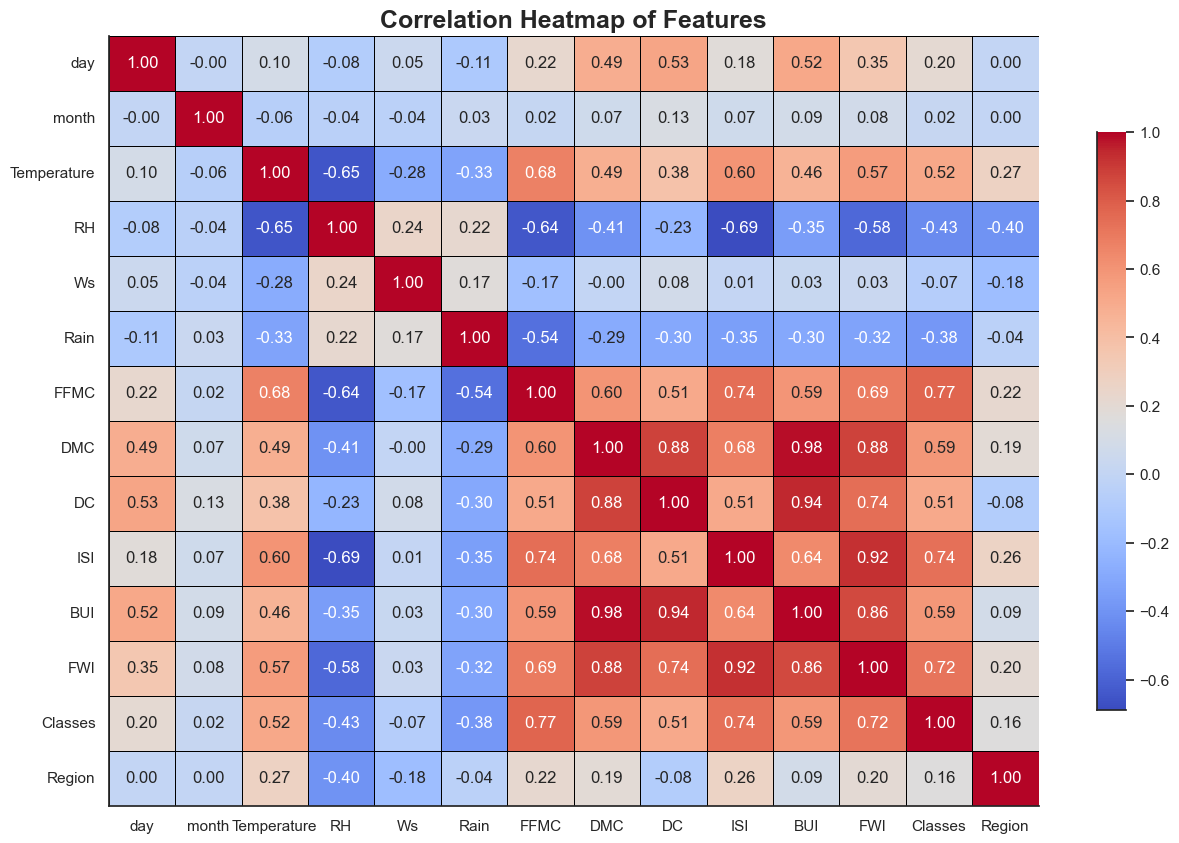

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set a modern aesthetic style and figure size
sns.set(style='white', rc={'figure.figsize':(15,10)})

# Create a heatmap with an attractive color palette, and formatted annotations
sns.heatmap(df1.corr(), annot=True, cmap='coolwarm', fmt='.2f', 
            linewidths=0.5, linecolor='black', cbar_kws={'shrink': 0.75})

# Add a title
plt.title('Correlation Heatmap of Features', fontsize=18, fontweight='bold')

# Remove top and right spines for a cleaner look
sns.despine()

plt.show()


**Column like 'DMC' and 'BUI', 'BUI' and 'DC', 'FWI' and 'ISI', 'DMC' and 'DC', 'DMC' and 'FWI', 'BUI' and 'FWI' are highly positively correlated that means we don't need all these columns and we can reduce multi-collinearity**

In [ ]:
# PLot density plot for all features
#plt.style.use('seaborn')
df.hist(bins=50, figsize=(20,15), ec = 'b')
plt.show()

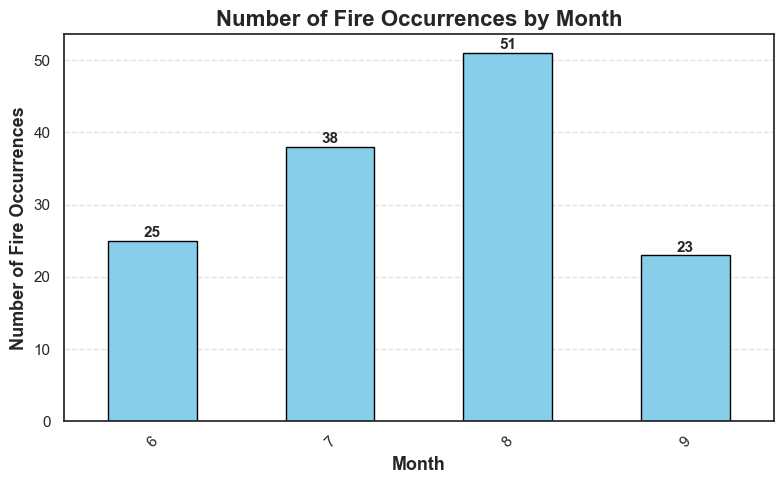

In [20]:
import matplotlib.pyplot as plt

# Group by month and sum the fire occurrences (where Classes == 1)
fire_by_month = df1.groupby("month")['Classes'].sum()

plt.figure(figsize=(8, 5))  # Increased the figure size for better visibility

# Plot the bar chart with an updated color palette
fire_by_month.plot(kind='bar', color='skyblue', edgecolor='black')

# Add value labels on top of each bar
for index, value in enumerate(fire_by_month):
    plt.text(index, value + 0.5, str(int(value)), ha='center', fontsize=11, fontweight='bold')

# Add labels and title with bold fonts
plt.title('Number of Fire Occurrences by Month', fontsize=16, fontweight='bold')
plt.xlabel('Month', fontsize=13, fontweight='bold')
plt.ylabel('Number of Fire Occurrences', fontsize=13, fontweight='bold')

# Customize gridlines
plt.grid(axis='y', linestyle='--', alpha=0.6)

# Rotate x-axis labels for better readability if necessary
plt.xticks(rotation=45)

# Display the plot
plt.tight_layout()  # Adjust layout to avoid label cut-off
plt.show()


__From the Bar garph it is clearly visible that the most number of fires were in the month of august followed by july__

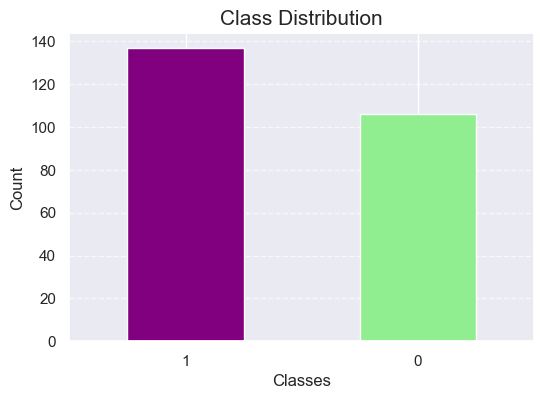

In [17]:
import matplotlib.pyplot as plt

# Count of each class
class_counts = df['Classes'].value_counts()

plt.figure(figsize=(6, 4))
class_counts.plot(kind='bar', color=['purple', 'lightgreen'])
plt.title('Class Distribution', fontsize=15)
plt.xlabel('Classes', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=0)  # Rotate x labels for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

**'Fire' Class is higher in number as compared to the other class**

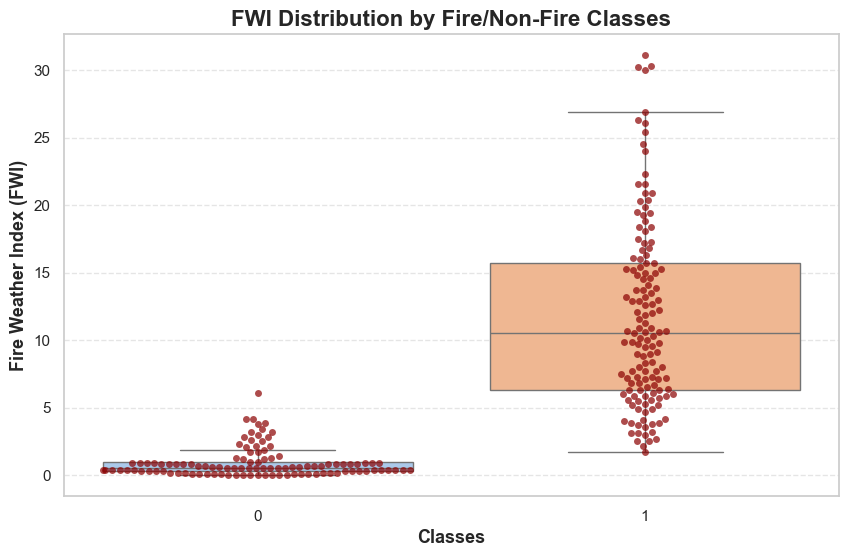

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set a modern, aesthetic style
sns.set(style='whitegrid')

plt.figure(figsize=(10, 6))

# Swarmplot with updated color and transparency
sns.swarmplot(x='Classes', y='FWI', data=df, color='darkred', alpha=0.7)

# Boxplot with a pastel color palette and no outliers
sns.boxplot(x='Classes', y='FWI', data=df, palette='pastel', showfliers=False)

# Update title and labels for better readability
plt.title('FWI Distribution by Fire/Non-Fire Classes', fontsize=16, fontweight='bold')
plt.xlabel('Classes', fontsize=13, fontweight='bold')
plt.ylabel('Fire Weather Index (FWI)', fontsize=13, fontweight='bold')

# Add grid only on the y-axis for better readability
plt.grid(axis='y', linestyle='--', alpha=0.5)

plt.show()


**It reveals that fire events tend to have significantly higher FWI values, indicating more severe weather conditions. The presence of outliers in the fire category suggests extreme weather scenarios, while the non-fire instances are clustered around lower FWI values, reflecting more stable conditions**

## Feature Selection and Split the Dataset

In [21]:
from sklearn.model_selection import train_test_split

# Define features and target variable
X = df.drop(columns=['Classes'])  # Target column
y = df['Classes']  # Adjust 'Classes' to your target column name

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


# Normalize Features

In [22]:
from sklearn.preprocessing import StandardScaler

# Normalize features using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)  # Only transform the test set


**Build the Logistic Regression Model**

In [23]:
# Initialize the Logistic Regression model
log_model = LogisticRegression()
log_model

LogisticRegression()

In [24]:
log_model.fit(X_train_scaled, y_train)

# Step 2: Make Predictions
y_pred = log_model.predict(X_test_scaled)

**evaluating the simple logitic regression model**

In [25]:
print(confusion_matrix(y_test, y_pred))  # Confusion Matrix
print("ac:", accuracy_score(y_test, y_pred))  # Accuracy
print("pr:", precision_score(y_test, y_pred))  # Precision
print("re:", recall_score(y_test, y_pred))  # Recall

[[19  2]
 [ 1 27]]
ac: 0.9387755102040817
pr: 0.9310344827586207
re: 0.9642857142857143


__The Logistic Regression model achieves an accuracy of 93.88%, with high precision (93.10%) and recall (96.43%), indicating effective performance in predicting forest fires. The model successfully minimizes false positives while maintaining a strong ability to identify true positives. Overall, it demonstrates robust predictive capabilities, suitable for critical applications.__

# Performing Cross-Validation

In [26]:
cv_scores = cross_val_score(log_model, X_train_scaled, y_train, cv=5, scoring='accuracy')

In [27]:
# Print Cross-Validation Results
print("Cross-Validation Accuracy Scores:", cv_scores)
print("Mean Cross-Validation Accuracy: {:.2f}".format(cv_scores.mean()))

# Step 3: Fit the model on the full training set
log_model.fit(X_train_scaled, y_train)

# Step 4: Make Predictions
y_pred = log_model.predict(X_test_scaled)

Cross-Validation Accuracy Scores: [0.92307692 0.94871795 0.92307692 0.97435897 1.        ]
Mean Cross-Validation Accuracy: 0.95


__Evaluating the model after performing cross validation__


In [28]:
print(confusion_matrix(y_test, y_pred))  # Confusion Matrix
print("ac:", accuracy_score(y_test, y_pred))  # Accuracy
print("pr:", precision_score(y_test, y_pred))  # Precision
print("re:", recall_score(y_test, y_pred))  # Recall

[[19  2]
 [ 1 27]]
ac: 0.9387755102040817
pr: 0.9310344827586207
re: 0.9642857142857143


__Both the simple Logistic Regression model and the cross-validated model yield identical performance metrics, achieving an accuracy of 93.88%, precision of 93.10%, and recall of 96.43%. This indicates consistent predictive performance, but cross-validation typically offers enhanced validation and reduces the risk of overfitting in more complex scenarios__

# Hyperparameter Tuning using Grid Search


In [29]:
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],  # Inverse of regularization strength
    'penalty': ['l1', 'l2'],  # Regularization techniques
    'class_weight': [None, 'balanced']  # Weights for classes
}

# Step 3: Set up GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(log_model, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train_scaled, y_train)

# Step 4: Print the best parameters
print("Best Parameters:", grid_search.best_params_)

Best Parameters: {'C': 10, 'class_weight': None, 'penalty': 'l2'}


# Evaluate the Model

In [30]:
best_model = grid_search.best_estimator_

# Step 6: Make predictions using the best model
y_pred_best = best_model.predict(X_test_scaled)

# Step 7: Evaluate the model's performance
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_best))
print("Accuracy:", accuracy_score(y_test, y_pred_best))
print("Precision:", precision_score(y_test, y_pred_best))
print("Recall:", recall_score(y_test, y_pred_best))

Confusion Matrix:
 [[20  1]
 [ 0 28]]
Accuracy: 0.9795918367346939
Precision: 0.9655172413793104
Recall: 1.0


__The model achieved a high accuracy of 97.96%, indicating effective classification of fire and non-fire instances. With a precision of 96.55%, it minimizes false positives, while a perfect recall of 100% shows it accurately identifies all actual fire instances. Overall, these results demonstrate the model's strong performance in fire detection.__

**Conclusion** : The hyperparameter-tuned model achieved superior performance with an accuracy of 97.96% and perfect recall of 100%, surpassing both the basic and cross-validated logistic regression models, which had the same accuracy of 93.88%. Although cross-validation improved model robustness, it did not enhance performance compared to the basic model. In summary, hyperparameter tuning significantly boosted the model's effectiveness for fire detection

# creating a pickle file 

In [31]:
best_model = grid_search.best_estimator_

# Step 6: Make predictions using the best model
y_pred_best = best_model.predict(X_test_scaled)

# Step 7: Evaluate the model's performance
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_best))
print("Accuracy:", accuracy_score(y_test, y_pred_best))
print("Precision:", precision_score(y_test, y_pred_best))
print("Recall:", recall_score(y_test, y_pred_best))

# Step 8: Save the best model as a pickle file
with open('best_logistic_regression_model.pkl', 'wb') as model_file:
    pickle.dump(best_model, model_file)

print("Model saved as 'best_logistic_regression_model.pkl'")

Confusion Matrix:
 [[20  1]
 [ 0 28]]
Accuracy: 0.9795918367346939
Precision: 0.9655172413793104
Recall: 1.0
Model saved as 'best_logistic_regression_model.pkl'
